<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/Classifier_Evaluation_with_ROC_Curves_for_Leukemia_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#( Loading: The code begins by loading two datasets, presumably containing features and labels related to leukemia and lung samples, respectively.
#Data Preprocessing: The datasets are assumed to be preprocessed and contain binary classification labels, as indicated by the presence of a 'label' column.
#Train-Test Split: Each dataset is split into training and testing sets using the train_test_split function from scikit-learn.
#Classifier Training: Three classifiers are trained on the leukemia dataset: Logistic Regression, Random Forest, and Support Vector Machine (SVM). These classifiers are initialized and fitted to the training data.
#Prediction and Evaluation: For each classifier, predicted probabilities for the positive class are obtained using the testing data. Then, ROC curves and AUC metrics are calculated to evaluate the classifiers' performance.
#Plotting ROC Curves: The ROC curves for each classifier are plotted using Matplotlib. Additionally, a diagonal line representing a random classifier (with an AUC of 0.5) is also plotted for comparison.
#Customization: The plot is customized with appropriate labels for the axes and the title.
#Displaying the Plot: The final plot showing the ROC curves is displayed.
#The project aims to compare the performance of different classifiers on two different datasets using ROC curves and AUC metrics. This evaluation helps in understanding how well each classifier discriminates between positive and negative instances and allows for the selection of the most suitable classifier for the given datasets. Additionally, it provides insights into the classifiers' ability to generalize to unseen data, which is crucial for building robust predictive models in various applications, including medical diagnostics.)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [8]:
# Load datasets
leukemia_data = pd.read_csv('leukemia.csv')
lungsample_data = pd.read_csv('lungsample_csv.csv')

In [10]:
print(leukemia_data.columns)
print(lungsample_data.columns)

Index(['M84371_rna1_s_at', 'J03779_at', 'X82240_rna1_at', 'U22376_cds2_s_at',
       'U79262_at', 'M27396_s_at', 'J04948_at', 'M19508_xpt3_s_at',
       'M22324_at', 'M23197_at',
       ...
       'D88270_at', 'X15414_at', 'X63527_at', 'X67951_at', 'L13278_at',
       'L14848_s_at', 'U46006_s_at', 'U49957_s_at', 'X01677_f_at', 'label'],
      dtype='object', length=108)
Index(['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       ...
       'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101',
       'label'],
      dtype='object', length=103)


In [11]:
# Split the data into training and testing sets for leukemia dataset
X_leukemia = leukemia_data.drop('label', axis=1)
y_leukemia = leukemia_data['label']
X_train_leukemia, X_test_leukemia, y_train_leukemia, y_test_leukemia = train_test_split(X_leukemia, y_leukemia, test_size=0.2, random_state=42)

# Split the data into training and testing sets for lung sample dataset
X_lungsample = lungsample_data.drop('label', axis=1)
y_lungsample = lungsample_data['label']
X_train_lungsample, X_test_lungsample, y_train_lungsample, y_test_lungsample = train_test_split(X_lungsample, y_lungsample, test_size=0.2, random_state=42)


In [12]:
# Split the data into training and testing sets for lung sample dataset
X_lungsample = lungsample_data.drop('label', axis=1)
y_lungsample = lungsample_data['label']
X_train_lungsample, X_test_lungsample, y_train_lungsample, y_test_lungsample = train_test_split(X_lungsample, y_lungsample, test_size=0.2, random_state=42)


In [13]:
# Train classifiers
classifier_lr = LogisticRegression(random_state=42)
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_svm = SVC(probability=True, random_state=42)

classifier_lr.fit(X_train_leukemia, y_train_leukemia)
classifier_rf.fit(X_train_leukemia, y_train_leukemia)
classifier_svm.fit(X_train_leukemia, y_train_leukemia)



SVC(probability=True, random_state=42)

In [14]:
# Predict probabilities for leukemia dataset
y_probs_lr_leukemia = classifier_lr.predict_proba(X_test_leukemia)[:, 1]
y_probs_rf_leukemia = classifier_rf.predict_proba(X_test_leukemia)[:, 1]
y_probs_svm_leukemia = classifier_svm.predict_proba(X_test_leukemia)[:, 1]



In [15]:
# Calculate ROC curve and AUC for leukemia dataset
fpr_lr_leukemia, tpr_lr_leukemia, _ = roc_curve(y_test_leukemia, y_probs_lr_leukemia)
fpr_rf_leukemia, tpr_rf_leukemia, _ = roc_curve(y_test_leukemia, y_probs_rf_leukemia)
fpr_svm_leukemia, tpr_svm_leukemia, _ = roc_curve(y_test_leukemia, y_probs_svm_leukemia)

roc_auc_lr_leukemia = auc(fpr_lr_leukemia, tpr_lr_leukemia)
roc_auc_rf_leukemia = auc(fpr_rf_leukemia, tpr_rf_leukemia)
roc_auc_svm_leukemia = auc(fpr_svm_leukemia, tpr_svm_leukemia)



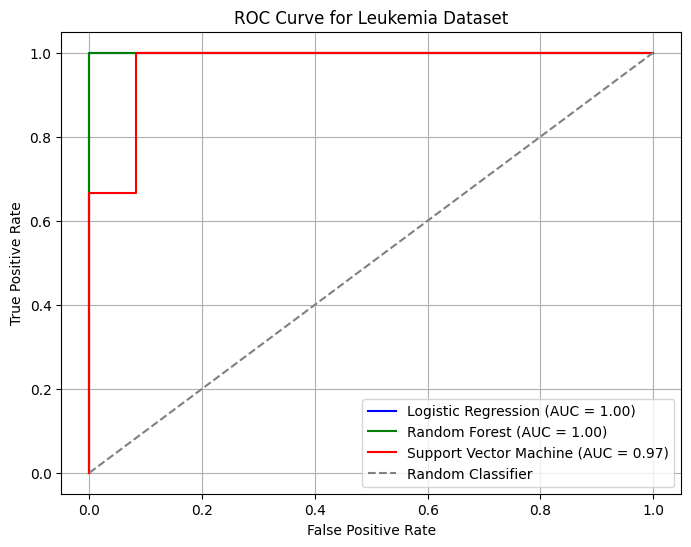

In [21]:
# Plot ROC curves for leukemia dataset
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_leukemia, tpr_lr_leukemia, label=f'Logistic Regression (AUC = {roc_auc_lr_leukemia:.2f})', color='blue')
plt.plot(fpr_rf_leukemia, tpr_rf_leukemia, label=f'Random Forest (AUC = {roc_auc_rf_leukemia:.2f})', color='green')
plt.plot(fpr_svm_leukemia, tpr_svm_leukemia, label=f'Support Vector Machine (AUC = {roc_auc_svm_leukemia:.2f})', color='red')

# Plot the diagonal line (random classifier)
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Leukemia Dataset')

# Show legend with specified labels
plt.legend()

plt.grid(True)
plt.show()
